# UIDE - EIG

# Prueba Final Tratamiento de Datos
# Nombre: Cristian Chamba.

In [638]:
import numpy as np
import sklearn
import os
import random
import re
import wget
import cv2
import pytesseract
import imutils
import argparse
import splitfoldersa
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pickle
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import load_model
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from mlxtend.plotting import plot_confusion_matrix

# Lectura del dataset y creamos las etiquetas

In [538]:
train_ds = tf.keras.utils.image_dataset_from_directory('./train', validation_split = 0.6, subset = "training", seed = 123, image_size = [300,300])

class_names = train_ds.class_names
print(class_names)


Found 1633 files belonging to 8 classes.
Using 654 files for training.
['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


# Preprocesamos las imagenes

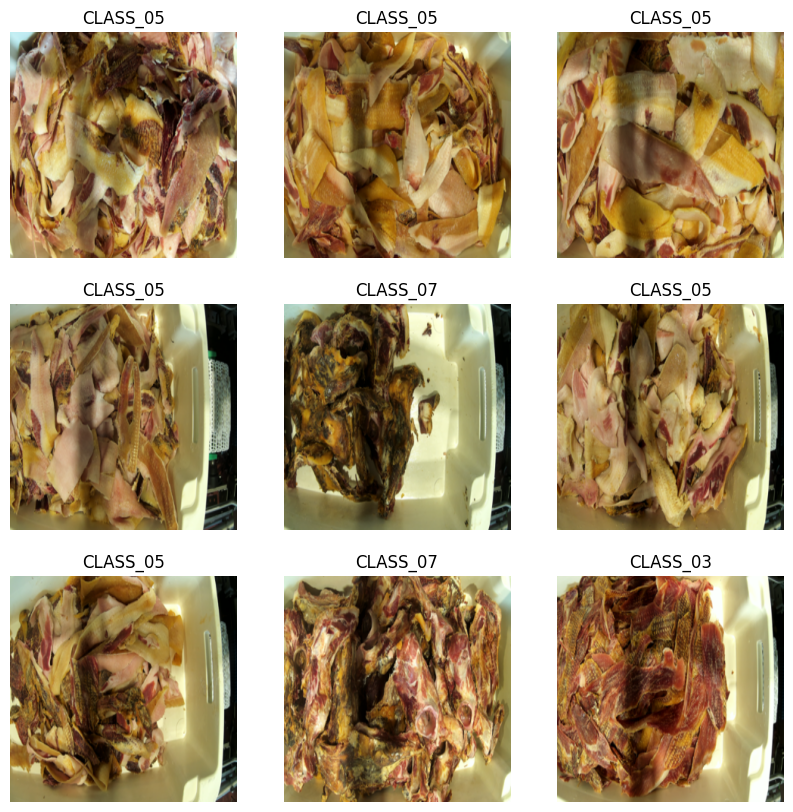

In [640]:
plt.figure(figsize=[10,10])

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Creamos el modelo de CNN

In [641]:
epochs = 20 
batch_size = 64 

num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(300, 300, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(), tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)   
])

photo_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
photo_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 300, 300, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 150, 150, 16)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)       

# Entrenamos el modelo: Aprende a clasificar imágenes

In [330]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
photo_train = photo_model.fit(train_ds, epochs=epochs, batch_size=batch_size)

Epoch 1/20
41/41 [==============================] - 55s 1s/step - loss: 0.0944 - accuracy: 0.9748
Epoch 2/20
41/41 [==============================] - 61s 1s/step - loss: 0.0014 - accuracy: 1.0000
Epoch 3/20
41/41 [==============================] - 54s 1s/step - loss: 3.9040e-04 - accuracy: 1.0000
Epoch 4/20
41/41 [==============================] - 58s 1s/step - loss: 2.6587e-04 - accuracy: 1.0000
Epoch 5/20
41/41 [==============================] - 58s 1s/step - loss: 1.5392e-04 - accuracy: 1.0000
Epoch 6/20
41/41 [==============================] - 60s 1s/step - loss: 1.1764e-04 - accuracy: 1.0000
Epoch 7/20
41/41 [==============================] - 57s 1s/step - loss: 1.1822e-04 - accuracy: 1.0000
Epoch 8/20
41/41 [==============================] - 64s 2s/step - loss: 8.4191e-05 - accuracy: 1.0000
Epoch 9/20
41/41 [==============================] - 62s 1s/step - loss: 8.2010e-05 - accuracy: 1.0000
Epoch 10/20
41/41 [==============================] - 63s 2s/step - loss: 6.2634e-05 - accu

In [331]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
photo_model.save("examen_final.h5py")

INFO:tensorflow:Assets written to: examen_final.h5py\assets


INFO:tensorflow:Assets written to: examen_final.h5py\assets


# Evaluamos la red

In [648]:
test_ds = tf.keras.utils.image_dataset_from_directory('./test', seed = 123, image_size = [300,300])

train_eval = photo_model.evaluate(train_ds, verbose=1)
test_eval = photo_model.evaluate(test_ds, verbose=1)
print("\n")
print(f"Accuracy test: {round(100 * test_eval[1], 2)}% \n")
print(f"Accuracy train: {round(100 * train_eval[1], 2)}% \n")


Found 810 files belonging to 8 classes.
26/26 [==============================] - 8s 293ms/step - loss: 0.9994 - accuracy: 0.8580


Accuracy test: 85.8% 

Accuracy train: 100.0% 



## Matrix confusion 

52/52 [==============================] - 21s 399ms/step
Found 810 images belonging to 8 classes.
Found 1633 images belonging to 8 classes.


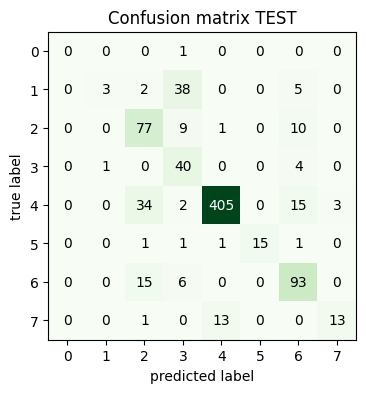

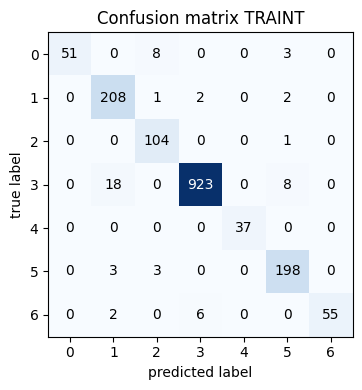

In [643]:
test_data_dir = './test'
train_data_dir = './train'

width_shape = 300
height_shape = 300

custom_Model= load_model("./examen_final.h5py")

test_datagen =ImageDataGenerator()
train_datagen =ImageDataGenerator()


test_predictions = custom_Model.predict(test_generator)
train_predictions = custom_Model.predict(train_generator)

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(width_shape, height_shape), class_mode='categorical', shuffle=False)
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(width_shape, height_shape), class_mode='categorical', shuffle=False)


y_pred = np.argmax(test_predictions, axis=1)
y_real = test_generator.classes
x_pred = np.argmax(train_predictions, axis=1)
x_real = train_generator.classes


y_matc=confusion_matrix(y_real, y_pred)
x_matc=confusion_matrix(x_real, x_pred)


plot_confusion_matrix(conf_mat=y_matc, figsize=(4,4), show_normed=False, cmap ='Greens' )
plt.title('Confusion matrix TEST')


plot_confusion_matrix(conf_mat=x_matc, figsize=(4,4), show_normed=False, cmap ='Blues')
plt.title('Confusion matrix TRAINT')

plt.tight_layout()


# Metrics on test dataset

In [644]:
print("Testing Set TEST: ")
print(classification_report(y_real, y_pred, digits=2 ))
print("Testing Set TRAIN: ")
print(classification_report(x_real, x_pred, digits=2 ))

Testing Set TEST: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.06      0.12        48
           2       0.59      0.79      0.68        97
           3       0.41      0.89      0.56        45
           4       0.96      0.88      0.92       459
           5       1.00      0.79      0.88        19
           6       0.73      0.82      0.77       114
           7       0.81      0.48      0.60        27

    accuracy                           0.80       810
   macro avg       0.66      0.59      0.57       810
weighted avg       0.84      0.80      0.79       810

Testing Set TRAIN: 
              precision    recall  f1-score   support

           1       1.00      0.82      0.90        62
           2       0.90      0.98      0.94       213
           3       0.90      0.99      0.94       105
           4       0.99      0.97      0.98       949
           5       1.00      1.00      

C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Procesamos una nueva imagen y verificamos su clasificación

In [645]:
image_path = '/Users/DELL/Documents/MESTRIA EN CIBERSEGURIDAD/Tratamiento de Datos/examen final/nuevas_fotos/file2_test.png'
image = tf.keras.preprocessing.image.load_img(image_path).resize([300,300])
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = photo_model.predict(input_arr)

1/1 [==============================] - 0s 139ms/step


In [646]:
score = tf.nn.softmax(predictions[0])
print("La imagen es de la {} con un {:.2f}% de exatitud".format(class_names[np.argmax(score)], 100 * np.max(score)))

La imagen es de la CLASS_07 con un 99.98% de exatitud
